# Step 1) Problem Statement:

In [141]:
To understand the importance of features involved in the Rental Price of a house.
To Predict the Rental Price of a similar house.

SyntaxError: invalid syntax (2405437818.py, line 1)

In [142]:
import pandas as pd
import numpy as np


# step2) Data Gathering:

In [143]:
df=pd.read_csv("Pune_rent.csv")
df.head()


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2


# Step3)EDA:

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22800 non-null  object
 1   bedroom        22800 non-null  int64 
 2   layout_type    22800 non-null  object
 3   property_type  22800 non-null  object
 4   locality       22800 non-null  object
 5   price          22800 non-null  object
 6   area           22800 non-null  int64 
 7   furnish_type   22800 non-null  object
 8   bathroom       22629 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [145]:
df.describe()

,bedroom,area
count,22800.000000,22800.000000
mean,1.873465,1041.622588
std,0.793189,588.915990
min,1.000000,100.000000
25%,1.000000,650.000000
50%,2.000000,960.000000
75%,2.000000,1200.000000
max,8.000000,7500.000000


In [146]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

AGENT      16271
OWNER       6097
BUILDER      432
Name: seller_type, dtype: int64
********************
2    10612
1     7925
3     3566
4      626
5       66
6        3
8        2
Name: bedroom, dtype: int64
********************
BHK    21726
RK      1074
Name: layout_type, dtype: int64
********************
Apartment            20172
Studio Apartment      1074
Independent House      912
Independent Floor      353
Villa                  278
Penthouse               11
Name: property_type, dtype: int64
********************
Wagholi           2169
Hinjewadi         1457
Wakad             1259
Kharadi           1220
Hadapsar          1135
                  ... 
Sindhi Colony        1
Kalwad               1
Baderaj Colony       1
Marunji Road         1
Aundh Gaon           1
Name: locality, Length: 459, dtype: int64
********************
15,000    1241
18,000    1156
12,000    1089
20,000    1002
16,000     969
          ... 
76,843       1
1.29         1
1.17         1
1.09         1
13,250  

In [147]:
df['price'] = df['price'].apply(lambda x: x.replace(',','')).astype('float')
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,18000.0,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,16500.0,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000.0,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,25000.0,1005,Semi-Furnished,2


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    22800 non-null  object 
 1   bedroom        22800 non-null  int64  
 2   layout_type    22800 non-null  object 
 3   property_type  22800 non-null  object 
 4   locality       22800 non-null  object 
 5   price          22800 non-null  float64
 6   area           22800 non-null  int64  
 7   furnish_type   22800 non-null  object 
 8   bathroom       22629 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.6+ MB


In [149]:
df['price']=df['price'].astype("int")
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,18000,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,16500,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,25000,1005,Semi-Furnished,2


## For checking Outliers in price column use boxplot

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Sahyadri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


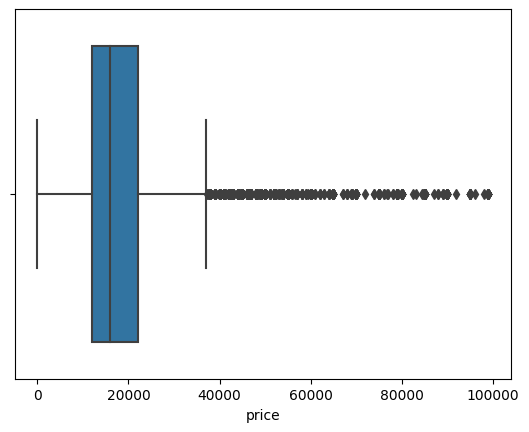

In [151]:
sns.boxplot(df["price"])
plt.show()

In [152]:
b=df["price"].loc[df['price']>40000].index
b

Int64Index([   18,    88,   132,   133,   134,   230,   240,   241,   242,
              243,
            ...
            22152, 22208, 22265, 22397, 22510, 22589, 22635, 22675, 22755,
            22778],
           dtype='int64', length=1059)

In [153]:
a = df[df['price'] < 1000].index
a


Int64Index([  246,   247,   248,   250,   253,   254,   255,   257,   258,
              263,
            ...
            18494, 18495, 18497, 18498, 18499, 18518, 19357, 19739, 22542,
            22641],
           dtype='int64', length=238)

In [154]:
df.drop(a,inplace=True)

In [155]:
df.drop(b,inplace=True)

C:\Users\Sahyadri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


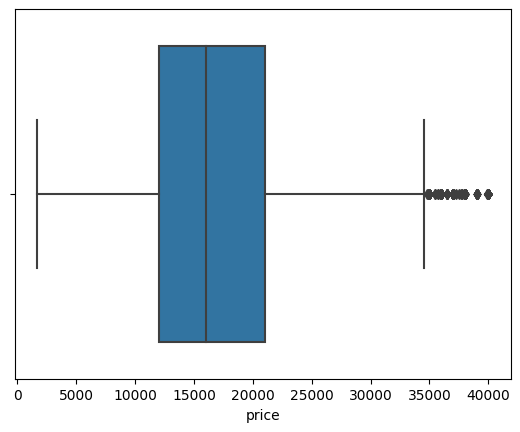

In [156]:
sns.boxplot(df["price"])
plt.show()                    # Now outliers from price column are removed

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    21503 non-null  object
 1   bedroom        21503 non-null  int64 
 2   layout_type    21503 non-null  object
 3   property_type  21503 non-null  object
 4   locality       21503 non-null  object
 5   price          21503 non-null  int32 
 6   area           21503 non-null  int64 
 7   furnish_type   21503 non-null  object
 8   bathroom       21350 non-null  object
dtypes: int32(1), int64(2), object(6)
memory usage: 1.6+ MB


In [158]:
df['seller_type'].value_counts().to_dict()

{'AGENT': 15044, 'OWNER': 6034, 'BUILDER': 425}

In [159]:
df['seller_type'].replace({'AGENT':0, 'OWNER':1, 'BUILDER':2},inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    21503 non-null  int64 
 1   bedroom        21503 non-null  int64 
 2   layout_type    21503 non-null  object
 3   property_type  21503 non-null  object
 4   locality       21503 non-null  object
 5   price          21503 non-null  int32 
 6   area           21503 non-null  int64 
 7   furnish_type   21503 non-null  object
 8   bathroom       21350 non-null  object
dtypes: int32(1), int64(3), object(5)
memory usage: 1.6+ MB


In [161]:
df["layout_type"].value_counts().to_dict()

{'BHK': 20431, 'RK': 1072}

In [162]:
df["layout_type"].replace({'BHK':1, 'RK':0},inplace=True)

In [163]:
df["property_type"].value_counts().to_dict()

{'Apartment': 19038,
 'Studio Apartment': 1072,
 'Independent House': 836,
 'Independent Floor': 347,
 'Villa': 206,
 'Penthouse': 4}

In [164]:
df["property_type"].replace({'Apartment':0,
 'Studio Apartment': 1,
 'Independent House': 2,
 'Independent Floor': 3,
 'Villa': 4,
 'Penthouse': 5},inplace=True)

In [165]:
df["locality"].value_counts().to_dict()

{'Wagholi': 2167,
 'Hinjewadi': 1447,
 'Wakad': 1253,
 'Kharadi': 1037,
 'Hadapsar': 1023,
 'Bavdhan': 784,
 'Pimple Saudagar': 656,
 'Baner': 614,
 'Wadgaon Sheri': 541,
 'Kothrud': 524,
 'Dhanori': 498,
 'Kondhwa': 450,
 'Viman Nagar': 431,
 'Mundhwa': 414,
 'Chinchwad': 373,
 'Dhayari': 370,
 'Lohegaon': 368,
 'Undri': 334,
 'Balewadi': 329,
 'Ravet': 272,
 'Wanowrie': 268,
 'NIBM Annex Mohammadwadi': 222,
 'Rahatani': 220,
 'Akurdi': 218,
 'Aundh': 210,
 'Kalyani Nagar': 205,
 'Pimple Gurav': 200,
 'Koregaon Park': 186,
 'Yerawada': 186,
 'Bibwewadi': 164,
 'Vadgaon Budruk': 157,
 'Vishrantwadi': 151,
 'Fursungi': 147,
 'Warje': 143,
 'Thergaon': 138,
 'Karve Nagar': 135,
 'Katraj': 133,
 'Ambegaon Budruk': 133,
 'Mahalunge': 133,
 'Pimple Nilakh': 133,
 'Nigdi': 128,
 'Tingre Nagar': 122,
 'Pimpri': 121,
 'Pashan': 118,
 'Chikhali': 115,
 'Moshi': 114,
 'Tathawade': 110,
 'Sus': 104,
 'Dhankawadi Police Station Road': 96,
 'Manjari': 84,
 'Sopan Baug': 84,
 'Nanded': 69,
 'Erandwa

In [166]:
df['locality'].head()

0     Mundhwa
1       Wakad
2     Wagholi
3     Kothrud
4    Yerawada
Name: locality, dtype: object

In [167]:
dict1={'Wagholi': 2167,
 'Hinjewadi': 1447,
 'Wakad': 1253,
 'Kharadi': 1037,
 'Hadapsar': 1023,
 'Bavdhan': 784,
 'Pimple Saudagar': 656,
 'Baner': 614,
 'Wadgaon Sheri': 541,
 'Kothrud': 524,
 'Dhanori': 498,
 'Kondhwa': 450,
 'Viman Nagar': 431,
 'Mundhwa': 414,
 'Chinchwad': 373,
 'Dhayari': 370,
 'Lohegaon': 368,
 'Undri': 334,
 'Balewadi': 329,
 'Ravet': 272,
 'Wanowrie': 268,
 'NIBM Annex Mohammadwadi': 222,
 'Rahatani': 220,
 'Akurdi': 218,
 'Aundh': 210,
 'Kalyani Nagar': 205,
 'Pimple Gurav': 200,
 'Koregaon Park': 186,
 'Yerawada': 186,
 'Bibwewadi': 164,
 'Vadgaon Budruk': 157,
 'Vishrantwadi': 151,
 'Fursungi': 147,
 'Warje': 143,
 'Thergaon': 138,
 'Karve Nagar': 135,
 'Katraj': 133,
 'Ambegaon Budruk': 133,
 'Mahalunge': 133,
 'Pimple Nilakh': 133,
 'Nigdi': 128,
 'Tingre Nagar': 122,
 'Pimpri': 121,
 'Pashan': 118,
 'Chikhali': 115,
 'Moshi': 114,
 'Tathawade': 110,
 'Sus': 104,
 'Dhankawadi Police Station Road': 96,
 'Manjari': 84,
 'Sopan Baug': 84,
 'Nanded': 69,
 'Erandwane': 68,
 'Sangamvadi': 65,
 'Wanwadi': 62,
 'Bhugaon': 62,
 'Gahunje': 61,
 'Handewadi': 58,
 'Mohammed wadi': 58,
 'New Sangavi': 56,
 'Bhosari': 55,
 'Talegaon Dabhade': 54,
 'Shivaji Nagar': 53,
 'Manjari Budruk': 53,
 'Chakan': 50,
 'Dighi': 48,
 'New Kalyani Nagar': 47,
 'Alandi': 47,
 'Parvati Darshan': 45,
 'NIBM': 39,
 'NIBM Annexe': 39,
 'Magarpatta': 38,
 'Gultekdi': 37,
 'Shivane': 34,
 'Dhayari Phata': 31,
 'Old Sangvi': 30,
 'Kalewadi': 28,
 'Ghorpadi': 27,
 'Kondhwa Budruk': 27,
 'Narhe': 26,
 'hingne Khurd': 25,
 'Deccan Gymkhana': 24,
 'Warje Malwadi': 24,
 'Shukrawar Peth': 24,
 'Punawale': 23,
 'Bopodi': 23,
 'Swargate': 22,
 'Gokhalenagar': 22,
 'Charholi Budruk': 22,
 'Talwade': 21,
 'Chandan Nagar': 21,
 'Sadashiv Peth': 20,
 'Somwar Peth': 19,
 'Loni Kalbhor': 19,
 'Anand Nagar': 18,
 'Bhegade Aali': 17,
 'Dattavadi': 16,
 'Pune Satara Road': 16,
 'Balaji Nagar': 16,
 'Nigdi Sector 24': 15,
 'Bhukum': 15,
 'Pune Station': 14,
 'Kasarwadi': 14,
 'Ambegaon Pathar': 14,
 'Pradhikaran Nigdi': 14,
 'Jambhulwadi': 13,
 'Ganesh Nagar': 13,
 'Kothrud Depot Road': 13,
 'Pirangut': 13,
 'Mamurdi': 13,
 'Shaniwar Peth': 12,
 'Kasba Peth': 12,
 'Agalambe': 12,
 'Vadgoan Sheri Rajendri Nagar': 12,
 'Bopkhel': 12,
 'Market yard': 12,
 'Baner Road': 12,
 'Daund': 12,
 'Lulla Nagar': 11,
 'Rasta Peth': 11,
 'Marunji': 11,
 'Senapati Bapat Road': 11,
 'Narayan Peth': 11,
 'Sahakar Nagar': 11,
 'maharshi nagar': 10,
 'Pimpri Chinchwad': 10,
 'Law College Road': 9,
 'Dehu Road Cantonment': 9,
 'Bharati Vidyapeeth Campus': 9,
 'Bhairav Nagar': 9,
 'Bibwewadi Kondhwa Road': 9,
 'Sanaswadi': 9,
 'Sukhsagar Nagar': 8,
 'Kausar Baugh': 8,
 'Ganesh Peth': 8,
 'Ashok Nagar': 8,
 'Dapodi': 8,
 'Yewalewadi': 8,
 'Kalewadi Pandhapur Road': 8,
 'Yamuna Nagar': 8,
 'Shewalewadi': 8,
 'Paud Road': 8,
 'Shikrapur': 8,
 'Mukund Nagar': 8,
 'Salunke Vihar': 7,
 'Old Sanghvi': 7,
 'Jambhe': 7,
 'Salisbury Park': 7,
 'Dhanakwadi': 7,
 'Awhalwadi': 7,
 'Walvekar Nagar': 7,
 'Rambaug Colony': 7,
 'Khadki': 7,
 'Ganj Peth': 7,
 'Ambegaon 1': 7,
 'Balewadi Gaon': 7,
 'Chinchwad Gaon': 7,
 'Dhaygude Wada': 7,
 'Vikas Nagar': 7,
 'Perugate': 6,
 'Bhawani Peth': 6,
 'Dhankawadi Road': 6,
 'Teen Hatti Chowk Road': 6,
 'Mohan Nagar': 6,
 'MAE Campus': 6,
 'Sinhgad Road': 6,
 'Gulab Nagar Pune': 6,
 'Sasane Nagar': 6,
 'kesnand': 6,
 'Sainath Nagar': 6,
 'Fatima Nagar': 6,
 'Guruwar Peth': 6,
 'bhusari colony': 6,
 'Shivtirth Nagar': 6,
 'BT Kawde': 5,
 'Maan': 5,
 'Munjaba Vasti': 5,
 'katraj kondhwa road': 5,
 'Pisoli': 5,
 'Keshav Nagar': 5,
 'Pune Solapur Road': 5,
 'Tulaja Bhawani Nagar': 5,
 'Raviwar Peth': 5,
 'Vanaz corner': 5,
 'Lonikand': 5,
 'aranyeshwar': 5,
 'Shirgaon': 5,
 'Laxman Nagar': 5,
 'Bhandarkar Road': 5,
 'Jambhul': 5,
 'Sunarwadi': 5,
 'Dhankawadi': 4,
 'Anand Tirth Nagar': 4,
 'Kolhewadi': 4,
 'Chhatrapati Sambhaji Nagar': 4,
 'Sanjay Park': 4,
 'Uttam Nagar': 4,
 'Shastri Nagar': 4,
 'Saswad': 4,
 'Vadgaon Sheri': 4,
 'Happy Colony': 4,
 'Dange Chowk': 4,
 'Dhole Patil Road': 4,
 'Nere': 4,
 'Manjari Khurd': 4,
 'Handewadi Road': 4,
 'Wadgaon Budruk': 4,
 'Hinjewadi Phase 1': 4,
 'Kalewadi Phata PimpriChinchwad': 3,
 'Shankar Sheth Rd': 3,
 'Ramkrishna Paramhans Nagar': 3,
 'Camp': 3,
 'Bund Garden': 3,
 'Hadapsar Gaon': 3,
 'Pashan Sus Road': 3,
 'Wagholi Road': 3,
 'Dhanukar Colony': 3,
 'Bakori Road': 3,
 'L&T Labour Colony': 3,
 'Hingne Budrukh': 3,
 'Chandkhed': 3,
 'Vishal Nagar': 3,
 'Digambar Nagar': 3,
 'New Sanghvi': 3,
 'Uruli Devachi': 3,
 'Boat Club Road': 3,
 'Sahakar Nagar II': 3,
 'Kondhwa Khurd': 3,
 'Satara road': 3,
 'Jambhulwadi Road': 3,
 'Lokmanya Nagar': 3,
 'Kirkatwadi': 3,
 'Bakhori': 3,
 'Model Colony': 3,
 'Pune Cantonment': 2,
 'Valvan Lonavla': 2,
 'DP Road': 2,
 'Kaspate Vasti': 2,
 'Megapolis Sunway Internal Road': 2,
 'Shinde Vasti': 2,
 'Yashwant Nagar': 2,
 'KondhwaUndriSaswad Road': 2,
 'Baramati': 2,
 'Mulshi': 2,
 'Wakadkar Wasti': 2,
 'Yashwantnagar': 2,
 'Kolte Patil': 2,
 'Nehru Nagar': 2,
 'Sector 27 Pradhikaran': 2,
 'Purnanagar': 2,
 'Talegaon Dhamdhere': 2,
 'Veerbhadra Nagar': 2,
 'Khadakwasla': 2,
 'chintamani park': 2,
 'Shindenagar': 2,
 'Padmavati': 2,
 'Shankarseth Road': 2,
 'Vakil Nagar': 2,
 'Vadgaon': 2,
 'Manaji Nagar': 2,
 'Shedge Vasti PimpriChinchwad': 2,
 'Kale Padal': 2,
 'Sector 29': 2,
 'bhekarai nagar': 2,
 'Ideal Colony': 2,
 'Kondhawe Dhawade': 2,
 'Kokane Mala': 2,
 'Karve Road Kothrud': 2,
 'National Society': 2,
 'Kiwale': 2,
 'Mahalunge Ingale': 2,
 'Dashrath Nagar Bhekrai Nagar': 2,
 'Bhelkenagar': 2,
 'Junnar': 2,
 'Kamshet': 2,
 'Wakad Pune': 2,
 'Indrayani Nagar Sector 2': 2,
 'Sant tukaram Nagar': 2,
 'Dadachi Wasti': 2,
 'Rajgurunagar': 2,
 'Vitthal Wadi': 2,
 'Bhusari colony right': 2,
 'Bhusari colony left': 2,
 'Shikshak nagar': 2,
 'Nanded Phata': 2,
 'Somatane': 2,
 'Walhekarwadi Chinchwad': 2,
 'Wadarvadi': 2,
 'Shirur': 2,
 'Baner Hill Trail': 2,
 'Dattanagar': 2,
 'SNBP School Road': 2,
 'Mundhwa Manjari Road': 2,
 'Dahanukar Colony': 2,
 'Madhav Nagar': 2,
 'Gananjay Society Chaitanya Nagar': 1,
 'Indrayani Nagar': 1,
 'Kunal Icon Road': 1,
 'Giridhar Nagar': 1,
 'Nigdi Sector 26': 1,
 'Karegaon': 1,
 'wadebolhai': 1,
 'Bopdev Ghat': 1,
 'Mangdewadi': 1,
 'Dehu': 1,
 'Renuka Nagar': 1,
 'Kothrud Bus Stand Road': 1,
 'Ranjangaon': 1,
 'Gananjay Society': 1,
 'Phursungi Village Road': 1,
 'Amar Srushti': 1,
 'Udyog Nagar': 1,
 'Gujrat Colony': 1,
 'Porwal Rd': 1,
 'Bhoirwadi': 1,
 'Karve Road Erandwane': 1,
 'Ghule Vasti': 1,
 'Laxmi Chowk Road': 1,
 'Narayangaon': 1,
 'Pratik Nagar': 1,
 'Mohan Nagar MIDC': 1,
 'Pangoli': 1,
 'MG Road': 1,
 'Jawalkar Nagar': 1,
 'Olkaiwadi': 1,
 'Pandav Nagar': 1,
 'Garmal': 1,
 'Kutwal Colony': 1,
 'Bhumkar Das Gugre Road': 1,
 'Deshmukhwadi': 1,
 'Pune Nagar Road': 1,
 'Modi Colony': 1,
 'Bhau Patil Road': 1,
 'Yerwada Village': 1,
 'Tukai Darshan': 1,
 'Ram Nagar': 1,
 'Yashwantrao Chavan Nagar': 1,
 'Sant Nagar': 1,
 'Shree Sant Eknath Nagar': 1,
 'mandai': 1,
 'Kaspate Vasti Road': 1,
 'Saibaba Nagar': 1,
 'Tilak Road': 1,
 'Vanaz Corner Pedestrian Crossing': 1,
 'Dehu Phata': 1,
 'Taljai Road': 1,
 'Sadhu Vaswani Chowk': 1,
 'Bharati Vidyapeeth': 1,
 'Wanawadi Gaon': 1,
 'Ambegaon PuneMumbai Hwy': 1,
 'Dhamalwadi Bhekrai Nagar': 1,
 'Gururaj Society': 1,
 'Sector No1 Bhosari': 1,
 'Shantiban Society': 1,
 'Pune Satara Rd': 1,
 'Wagholi Kesnand Wadegaon Road': 1,
 'Someshwarwadi': 1,
 'Baner Pashan Link Road': 1,
 'Manjri Village Road': 1,
 'Rajas Society': 1,
 'ITI road': 1,
 'AWHO Hadapsar Colony': 1,
 'Subhas Nagar': 1,
 'Pandhari Nagar': 1,
 'Kranti Nagar': 1,
 'Santhosh Nagar': 1,
 'Wakad Chowk Road': 1,
 'Elite 27': 1,
 'Vardhaman Township Sasane Nagar': 1,
 'Kalyani Nagar Annexe': 1,
 'Kolwadi': 1,
 'Blue Ridge   Paranjpe Schemes': 1,
 'Vishal Nagar Main': 1,
 'Wadegaon': 1,
 'Siddharth nagar': 1,
 'Budhwar Peth': 1,
 'Morwadi': 1,
 'Koregaon Bhima': 1,
 'Sheela Vihar Colony': 1,
 'bavdhan patil nagar': 1,
 'Talegaon': 1,
 'Mangawadi': 1,
 'Dattwadi': 1,
 'Ubale Nagar': 1,
 'Koregaon Park Annexe': 1,
 'Ghorapdi': 1,
 'Akurdi Chowk': 1,
 'Pisoli Road': 1,
 'Chikhali Sector 16': 1,
 'Vijay Nagar': 1,
 'Adarsh Nagar Kiwale': 1,
 'Chandani Chowk': 1,
 'Eklavya Colony': 1,
 'Satar Nagar': 1,
 'Vittalvadi': 1,
 'Vishal nagar square new dp road': 1,
 'Sky Water Road': 1,
 'Adarsh Nagar Lohgaon': 1,
 'Netaji Nagar': 1,
 'BT Kawade Road': 1,
 'Satyapuram Co operative Housing Society': 1,
 'Bodkewadi': 1,
 'New DP Road': 1,
 'Murlidhar Housing Society': 1,
 'Pan Card Club Road': 1,
 'Pratibha Nagar': 1,
 'Munjaba Basti': 1,
 'Sharad Nagar': 1,
 'Mundhwa Kharadi Road': 1,
 'Varale Pune': 1,
 'Kanhe': 1,
 'Indryani nagar': 1,
 'Tukaram Nagar': 1,
 'Mayur Nagari': 1,
 'Jangali Maharaj Road': 1,
 'Kondwa khurd road': 1,
 'Empire Estate Phase 1': 1,
 'Shree Sidhivinayaka Nagri': 1,
 'Hanuman Nagar': 1,
 'Vallabh Nagar': 1,
 'Nimbalkar Nagar Lohgaon': 1,
 'Tilekar Nagar': 1,
 'Satavwadi': 1,
 'Om Colony': 1,
 'paud': 1,
 'EON Free Zone': 1,
 'Salunke Vihar Road': 1,
 'Mukai Nagar': 1,
 'Ramtekdi Industrial Area': 1,
 'Sakal Nagar': 1,
 'Siddartha Nagar': 1,
 'Phase 2': 1,
 'Nerhe': 1,
 'Kondhwa Budrukh': 1,
 'Balewadi Phata': 1,
 'Madhala Vada': 1,
 'Mukesh Nagar': 1,
 'Vasant Vihar': 1,
 'Marvel Fria Road': 1,
 'Tapodham': 1,
 'Sindhi Colony': 1,
 'Kalwad': 1,
 'Baderaj Colony': 1,
 'Marunji Road': 1,
 'Aundh Gaon': 1}

In [168]:
dict2=dict(zip(dict1.keys(),np.arange(1,455)))
dict2

{'Wagholi': 1,
 'Hinjewadi': 2,
 'Wakad': 3,
 'Kharadi': 4,
 'Hadapsar': 5,
 'Bavdhan': 6,
 'Pimple Saudagar': 7,
 'Baner': 8,
 'Wadgaon Sheri': 9,
 'Kothrud': 10,
 'Dhanori': 11,
 'Kondhwa': 12,
 'Viman Nagar': 13,
 'Mundhwa': 14,
 'Chinchwad': 15,
 'Dhayari': 16,
 'Lohegaon': 17,
 'Undri': 18,
 'Balewadi': 19,
 'Ravet': 20,
 'Wanowrie': 21,
 'NIBM Annex Mohammadwadi': 22,
 'Rahatani': 23,
 'Akurdi': 24,
 'Aundh': 25,
 'Kalyani Nagar': 26,
 'Pimple Gurav': 27,
 'Koregaon Park': 28,
 'Yerawada': 29,
 'Bibwewadi': 30,
 'Vadgaon Budruk': 31,
 'Vishrantwadi': 32,
 'Fursungi': 33,
 'Warje': 34,
 'Thergaon': 35,
 'Karve Nagar': 36,
 'Katraj': 37,
 'Ambegaon Budruk': 38,
 'Mahalunge': 39,
 'Pimple Nilakh': 40,
 'Nigdi': 41,
 'Tingre Nagar': 42,
 'Pimpri': 43,
 'Pashan': 44,
 'Chikhali': 45,
 'Moshi': 46,
 'Tathawade': 47,
 'Sus': 48,
 'Dhankawadi Police Station Road': 49,
 'Manjari': 50,
 'Sopan Baug': 51,
 'Nanded': 52,
 'Erandwane': 53,
 'Sangamvadi': 54,
 'Wanwadi': 55,
 'Bhugaon': 56,
 '

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    21503 non-null  int64 
 1   bedroom        21503 non-null  int64 
 2   layout_type    21503 non-null  int64 
 3   property_type  21503 non-null  int64 
 4   locality       21503 non-null  object
 5   price          21503 non-null  int32 
 6   area           21503 non-null  int64 
 7   furnish_type   21503 non-null  object
 8   bathroom       21350 non-null  object
dtypes: int32(1), int64(5), object(3)
memory usage: 1.6+ MB


In [170]:
df['locality'].replace(dict2,inplace=True)

In [171]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,1,1,1,3,14,6750,450,Unfurnished,1
1,1,2,1,0,3,18000,916,Unfurnished,2
2,1,3,1,0,1,16500,1085,Semi-Furnished,3
3,1,1,0,1,10,8000,250,Furnished,1
4,1,2,1,0,29,25000,1005,Semi-Furnished,2


In [172]:
df["furnish_type"].value_counts().to_dict()

{'Unfurnished': 9651, 'Semi-Furnished': 8481, 'Furnished': 3371}

In [173]:
df["furnish_type"].replace({'Unfurnished':0, 'Semi-Furnished':1, 'Furnished':2},inplace=True)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    21503 non-null  int64 
 1   bedroom        21503 non-null  int64 
 2   layout_type    21503 non-null  int64 
 3   property_type  21503 non-null  int64 
 4   locality       21503 non-null  int32 
 5   price          21503 non-null  int32 
 6   area           21503 non-null  int64 
 7   furnish_type   21503 non-null  int64 
 8   bathroom       21350 non-null  object
dtypes: int32(2), int64(6), object(1)
memory usage: 1.5+ MB


In [197]:
df["bathroom"].value_counts()

2    11069
1     7582
3     2573
4       88
2       26
5        7
1        4
6        1
Name: bathroom, dtype: int64

In [198]:
df["bathroom"].replace({"East facing":2,"West facing":2,"Grfloor":2,
"1 of 2floor":2,
"NorthEast facing":1,
"North facing":1,
"11 of 11floor":1,
"1 of 3floor":1},inplace=True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    21503 non-null  int64 
 1   bedroom        21503 non-null  int64 
 2   layout_type    21503 non-null  int64 
 3   property_type  21503 non-null  int64 
 4   locality       21503 non-null  int32 
 5   price          21503 non-null  int32 
 6   area           21503 non-null  int64 
 7   furnish_type   21503 non-null  int64 
 8   bathroom       21350 non-null  object
dtypes: int32(2), int64(6), object(1)
memory usage: 1.5+ MB


In [200]:
df['bathroom'].value_counts()

2    11069
1     7582
3     2573
4       88
2       26
5        7
1        4
6        1
Name: bathroom, dtype: int64

In [203]:
df.drop("bathroom",axis=1,inplace=True)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 22799
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   seller_type    21503 non-null  int64
 1   bedroom        21503 non-null  int64
 2   layout_type    21503 non-null  int64
 3   property_type  21503 non-null  int64
 4   locality       21503 non-null  int32
 5   price          21503 non-null  int32
 6   area           21503 non-null  int64
 7   furnish_type   21503 non-null  int64
dtypes: int32(2), int64(6)
memory usage: 1.8 MB


In [228]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [229]:
df.corr()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type
seller_type,1.000000,-0.206496,-0.161716,0.182916,0.224005,-0.313916,-0.206127,-0.033882
bedroom,-0.206496,1.000000,0.258308,-0.085537,-0.118702,0.674555,0.828401,0.176227
layout_type,-0.161716,0.258308,1.000000,-0.264399,-0.058166,0.288053,0.309501,0.075516
property_type,0.182916,-0.085537,-0.264399,1.000000,0.105894,-0.126574,-0.004471,-0.079669
locality,0.224005,-0.118702,-0.058166,0.105894,1.000000,-0.115291,-0.119484,-0.015041
price,-0.313916,0.674555,0.288053,-0.126574,-0.115291,1.000000,0.715306,0.378528
area,-0.206127,0.828401,0.309501,-0.004471,-0.119484,0.715306,1.000000,0.202653
furnish_type,-0.033882,0.176227,0.075516,-0.079669,-0.015041,0.378528,0.202653,1.000000


In [230]:
x=df.drop("price",axis=1)
y=df["price"]

In [231]:
std=StandardScaler()
std.fit(x)

StandardScaler()

In [232]:
var=std.transform(x)
x_std=pd.DataFrame(var,columns=x.columns)
x_std.head

<bound method NDFrame.head of        seller_type   bedroom  layout_type  property_type  locality      area  \
0         1.340602 -1.127679     0.229062       4.096111 -0.291405 -1.321675   
1         1.340602  0.318438     0.229062      -0.316648 -0.520759 -0.087825   
2         1.340602  1.764555     0.229062      -0.316648 -0.562460  0.359644   
3         1.340602 -1.127679    -4.365635       1.154272 -0.374807 -1.851225   
4         1.340602  0.318438     0.229062      -0.316648  0.021351  0.147825   
...            ...       ...          ...            ...       ...       ...   
21498     1.340602 -1.127679     0.229062      -0.316648 -0.270555 -0.792126   
21499     1.340602 -1.127679    -4.365635       1.154272 -0.395657 -1.586450   
21500     1.340602 -1.127679     0.229062      -0.316648 -0.374807 -1.483188   
21501    -0.631281 -1.127679     0.229062      -0.316648 -0.520759 -0.739171   
21502    -0.631281  0.318438     0.229062      -0.316648  0.834516 -0.394964   

       fu

In [233]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,random_state=1,test_size=0.4)

In [234]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [235]:
model=KNeighborsRegressor()

In [236]:
model.fit(x_train,y_train)

KNeighborsRegressor()

In [237]:
y_test_pred=model.predict(x_test)
r2_test=r2_score(y_test,y_test_pred)
r2_test

0.7223775185953001

In [238]:
y_train_pred=model.predict(x_train)
r2_train=r2_score(y_train,y_train_pred)
r2_train

0.8222201346800923

In [244]:
knn_model=KNeighborsRegressor()
hyp={
    "n_neighbors":np.arange(2,20),
"p":[1,2]}
gscv=GridSearchCV(knn_model,hyp,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': [1, 2]})

In [245]:
gscv.best_params_

{'n_neighbors': 6, 'p': 1}

In [246]:
model=KNeighborsRegressor(n_neighbors=6, p=1)
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6, p=1)

In [247]:
y_test_pred=model.predict(x_test)
r2_test=r2_score(y_test,y_test_pred)
r2_test

0.7244653826902117

In [248]:
y_train_pred=model.predict(x_train)
r2_train=r2_score(y_train,y_train_pred)
r2_train

0.8128096950690584

In [250]:
import pickle
with open("std.pickle","wb") as f:
    pickle.dump(std,f)

In [251]:
with open("model.pickle","wb") as f:
    pickle.dump(model,f)